# AMPU Congressional Compisition

#### Packages

In [31]:
#
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

### Load data

In [32]:
df = pd.read_excel('../Data/Congress_Comp.xlsx')
df.head(5)

,Session,Congress Title,Year,Red House,Blue House,Red Gov,Blue Gov,Red Sen,Blue Sen,President Party,President
0,1,1st,1788,23,4,9,4,20,6,Red,Benedict Arnold
1,2,2nd,1790,6,22,2,11,16,10,Red,Benedict Arnold
2,3,3rd,1792,10,18,4,9,12,14,Blue,Lightfoot Lee
3,4,4th,1794,17,12,6,7,11,15,Blue,Lightfoot Lee
4,5,5th,1796,21,8,9,5,16,12,Red,Pierce Butler


### Define Functions

In [147]:
def comp_bar(axs, cmap, party_chamber, range_chamber, red_party=True, lw=10):
    '''
    Will plot out a party's composition of congressmen

    axs = axes to plot on
    cmap = color map
    party_chamber = number
    range_chamber = total number of seats
    red_party =  will project the bar to the right if true, and left if false
    '''
    if red_party:
        bar_modifier = 1
        text_modifer_1 = 3.2
        text_modifer_2 = -1

    else:
        bar_modifier = -1
        text_modifer_1 = -2.5
        text_modifer_2 = 1

    

    axs.hlines(y=y, xmin=0, xmax=party_chamber*bar_modifier,
            color=cmap, alpha=1, linewidth=lw)
    
    #annotation
    for i in range(len(y)):
        '''
        x_val is where thet text annotation will be placed along the x-axis. 
        Need to add a better formula, and perhaps a condition to change fontcolor black when party_ch
        '''
        party_advantage = party_chamber[i] / range_chamber

        x_val =  width * party_advantage * text_modifer_1 + text_modifer_2
        axs.text(x=x_val, y=y[i]+.15, s=party_chamber[i], color='white', fontsize=9, horizontalalignment='right', weight='bold')

### Environment Setup

In [42]:
dark_red = '#ae3f38'
light_red = '#cd957c'
dark_blue = '#59637e'
light_blue = '#b0b7c7'

y = df['Session']
house1 = df['Red House']
house2 = df['Blue House']
senate1 = df['Red Sen']
senate2 = df['Blue Sen']

house_range = (house1 + house2).max()
median_seat_house = 1 + (house1 - house2) // 2
senate_range = (senate1 + senate2).max()
median_seat_senate = 1 + (senate1 - senate2) // 2

house_red_cmap = np.where(house1 > house2, dark_red, light_red)
house_blue_cmap = np.where(house2 > house1, dark_blue, light_blue)
senate_red_cmap = np.where(senate1 > senate2, dark_red, light_red)
senate_blue_cmap = np.where(senate2 > senate1, dark_blue, light_blue)
president_cmap = np.where(df['President Party'] == 'Red', dark_red, dark_blue)

## Plots

### First StepPlot

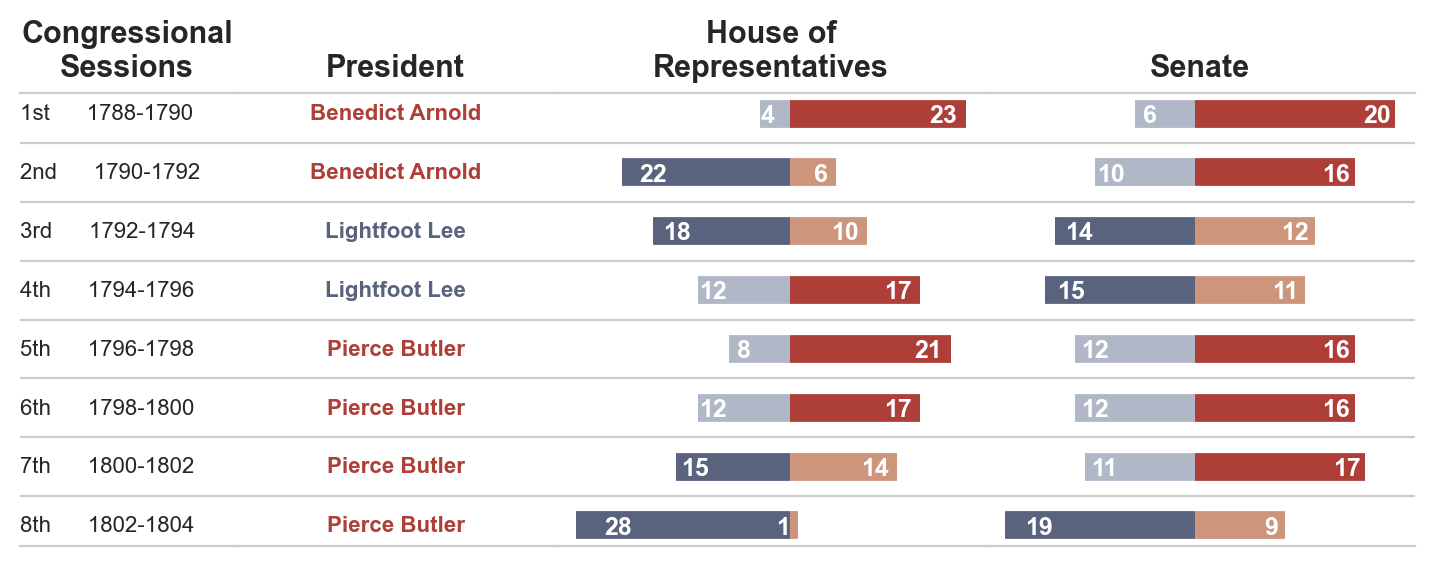

In [157]:
height = 3
width = 9
hor_plots = 1
ver_plots = 4

fig, axs = plt.subplots(hor_plots, ver_plots, gridspec_kw={'width_ratios': [2, 3, 4, 4]}, sharey=True, figsize=(width, height), dpi=200)
fig.subplots_adjust(wspace=0, hspace=0)
[axs[i].spines['right'].set_visible(False) for i in range(len(axs))]
[axs[i].spines['left'].set_visible(False) for i in range(len(axs))]

comp_bar(axs[2], house_red_cmap, house1, house_range)
comp_bar(axs[2], house_blue_cmap, house2, house_range, red_party=False)
comp_bar(axs[3], senate_red_cmap, senate1, senate_range)
comp_bar(axs[3], senate_blue_cmap, senate2, senate_range, red_party=False)


# plot the session, and the president
for i in range(len(y)):
    congress_title = df['Congress Title'][i] + '      ' + df['Year'][i].astype(str) +'-'+ (df['Year'][i]+2).astype(str)
    axs[0].text(y=y[i] + .01, x=0, s=congress_title, 
    horizontalalignment='left', verticalalignment='center', fontsize=8)

    axs[1].text(y=y[i] +.01, x=.5, s=df['President'][i], 
    horizontalalignment='center', verticalalignment='center', fontsize=8, color=president_cmap[i], weight='bold', )

# Uncomment to see the Median Seat
# axs[2].scatter(median_seat_house, y, marker='|', color='black', zorder=10, s=100)
# axs[3].scatter(median_seat_senate, y, marker='|', color='black', zorder=10, s=100)

# don't show x axis
[axs[i].set_xticks([]) for i in range(len(axs))]
[axs[i].grid(False, axis='x') for i in range(len(axs))]


# format the y axis
[axs[2].set_yticks([j + .5 for j in range(1,len(y))]) for i in range(len(axs))]
[axs[2].set_yticklabels([]) for i in range(len(axs))]

# Titles
axs[0].set_title('Congressional\nSessions')
axs[1].set_title('President')
axs[2].title.set_text('House of\nRepresentatives')
axs[3].title.set_text('Senate')
[axs[i].title.set_fontweight('bold') for i in range(len(axs))]
[axs[i].title.set_fontsize(11) for i in range(len(axs))]

# invert axes
axs[2].invert_yaxis()

fig.savefig('../Figures/Congress_Comp.png', dpi=200)
plt.show()
